In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#warnings.filterwarnings('ignore', message='.*Pyarrow.*')

## Tasks

### 1. Read the data from the CSV file into a DataFrame.

In [30]:
my_file = 'scanner_data.csv'
df = pd.read_csv(my_file)

### 2. Run the info() method and display the first five rows of the data.

In [48]:
start = df.info().head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


AttributeError: 'NoneType' object has no attribute 'head'

### 3. Drop the two index columns as well as the SKU column.

In [49]:
df_cleaned = df.drop(columns=['Unnamed: 0', 'Transaction_ID', 'SKU'])

print(df_cleaned.head())

         Date  Customer_ID SKU_Category  Quantity  Sales_Amount
0  02/01/2016         2547          X52       1.0          3.13
1  02/01/2016          822          2ML       1.0          5.46
2  02/01/2016         3686          0H2       1.0          6.35
3  02/01/2016         3719          0H2       1.0          5.59
4  02/01/2016         9200          0H2       1.0          6.88


### 4. Convert the Date column to the datetTime data type.

In [50]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d/%m/%Y')

print(df_cleaned.dtypes)



Date            datetime64[ns]
Customer_ID              int64
SKU_Category            object
Quantity               float64
Sales_Amount           float64
dtype: object


### 5. Group the data by the Date, Customer_ID, and SKU_Category columns, and calculate the sum of the Quantity and Sales_Amount columns. Then, display the first five rows of grouped data.

In [52]:
grouped_df = df.groupby(['Date', 'Customer_ID', 'SKU_Category']).sum()[['Quantity', 'Sales_Amount']]
grouped_df

Quantity  Sales_Amount
Date       Customer_ID SKU_Category                        
01/02/2016 37          U5F                1.0          2.49
           50          W41                5.0          2.86
           91          2ML                1.0          5.79
           106         N5F                1.0          8.18
                       N8U                1.0          0.88
...                                       ...           ...
31/12/2016 22481       R6E                2.0         12.93
           22593       H15                1.0          6.24
           22595       C8Z                1.0         11.69
           22596       B93                1.0         23.98
           22625       0KX                1.0          1.11

[120968 rows x 2 columns]

### 6. Resample the data to a monthly frequency, and save the results in a new DataFrame.

In [38]:
grouped_df_reset = grouped_df.reset_index()

grouped_df_reset['Date'] = pd.to_datetime(grouped_df_reset['Date'], format='%d/%m/%Y')
grouped_df_reset.set_index('Date', inplace=True)
monthly_df = grouped_df_reset.resample('ME').sum()
print(monthly_df.head())


            Customer_ID                                       SKU_Category  \
Date                                                                         
2016-01-31     42691740  LPFTW8Q4NR6E8H8LGIXG4H15P42Q4NR6E0H2A38J4RP42Y...   
2016-02-29     44452519  U5FW412MLN5FN8UILFMOE0WT1VL6BZA38O38QV7Z231VLB...   
2016-03-31     89681859  A38FEW84J1EOC8ZLSDI4YN8UDJIH15N8UV9H2O0P426KO1...   
2016-04-30    124773840  F9B2MLJ4RSJSLPFSJSU5FLGIR6E29ASIMH15P420H2EKMF...   
2016-05-31    151583115  N8UC8ZPZWF9BFEWIEVJ4ROQAOXHQ4NU5FQ4NTVLR6EJPIN...   

             Quantity  Sales_Amount  
Date                                 
2016-01-31  14874.370     111200.28  
2016-02-29  15253.710     122114.61  
2016-03-31  15686.100     127924.54  
2016-04-30  16633.486     138172.11  
2016-05-31  18295.257     142719.86  


### 7. Plot the monthly Quantity and Sales_Amount columns by date in a Pandas line plot.

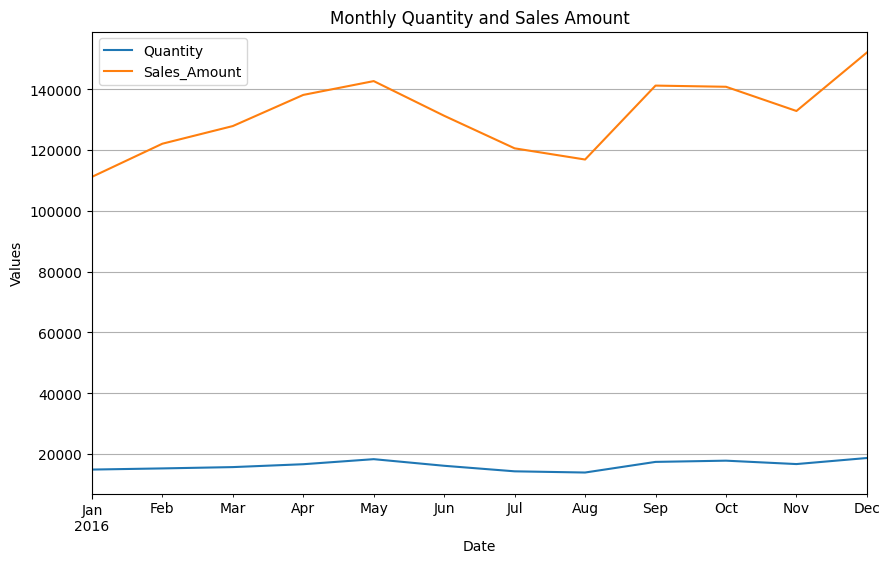

In [39]:
monthly_df[['Quantity', 'Sales_Amount']].plot(kind='line', figsize=(10, 6))

plt.title('Monthly Quantity and Sales Amount')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

### 8. Resample the data to a quarterly frequency, and save the results in a new DataFrame.

In [41]:
quarterly_df = monthly_df.resample('QE').sum()

print(quarterly_df.head())

quarterly_df.to_csv('scanner_data.csv')


            Customer_ID                                       SKU_Category  \
Date                                                                         
2016-03-31    176826118  LPFTW8Q4NR6E8H8LGIXG4H15P42Q4NR6E0H2A38J4RP42Y...   
2016-06-30    413025428  F9B2MLJ4RSJSLPFSJSU5FLGIR6E29ASIMH15P420H2EKMF...   
2016-09-30    410660886  N8UR6E8H8H15N8UXAEQFKR6EZ23H15QV7X52ZX501FIEVL...   
2016-12-31    498728206  N8UP42R6EP42JPIP42F9BN5FFZTN8UXG4DMAQ4NR6EJKCT...   

             Quantity  Sales_Amount  
Date                                 
2016-03-31  45814.180     361239.43  
2016-06-30  51049.339     412197.32  
2016-09-30  45597.710     378740.84  
2016-12-31  53163.200     425861.03  


### 9. Plot the quarterly Quantity and Sales_Amount columns by date in a Pandas line plot..

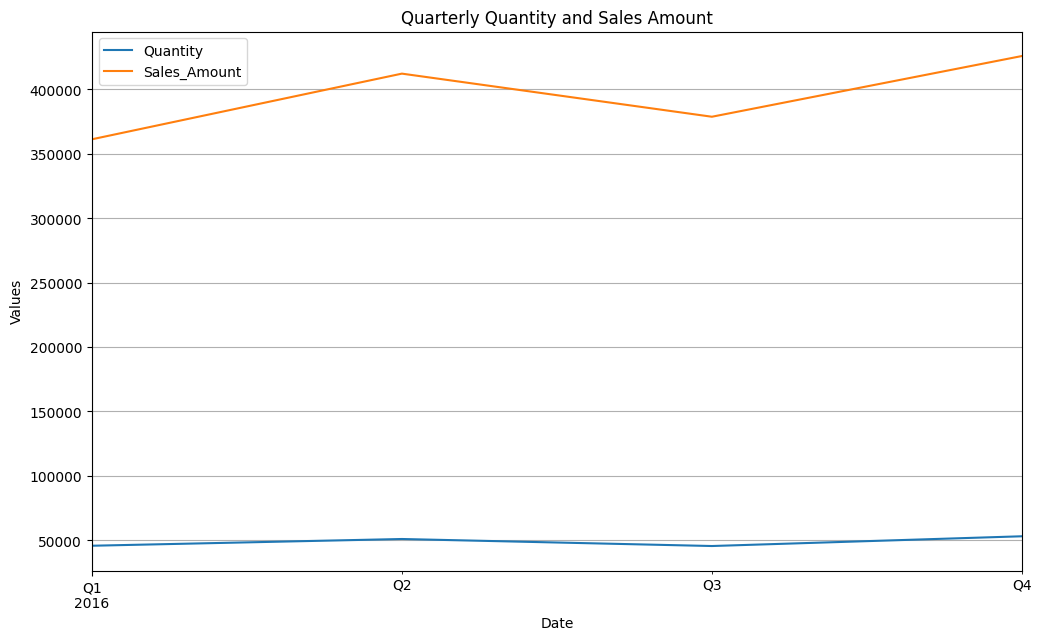

In [42]:
quarterly_df[['Quantity', 'Sales_Amount']].plot(kind='line', figsize=(12, 7))

plt.title('Quarterly Quantity and Sales Amount')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

### 10. Add the running total for the Sales_Amount column to the DataFrame that contains the monthly data.

In [43]:
monthly_df['Running_Total_Sales'] = monthly_df['Sales_Amount'].cumsum()

print(monthly_df.head())

            Customer_ID                                       SKU_Category  \
Date                                                                         
2016-01-31     42691740  LPFTW8Q4NR6E8H8LGIXG4H15P42Q4NR6E0H2A38J4RP42Y...   
2016-02-29     44452519  U5FW412MLN5FN8UILFMOE0WT1VL6BZA38O38QV7Z231VLB...   
2016-03-31     89681859  A38FEW84J1EOC8ZLSDI4YN8UDJIH15N8UV9H2O0P426KO1...   
2016-04-30    124773840  F9B2MLJ4RSJSLPFSJSU5FLGIR6E29ASIMH15P420H2EKMF...   
2016-05-31    151583115  N8UC8ZPZWF9BFEWIEVJ4ROQAOXHQ4NU5FQ4NTVLR6EJPIN...   

             Quantity  Sales_Amount  Running_Total_Sales  
Date                                                      
2016-01-31  14874.370     111200.28            111200.28  
2016-02-29  15253.710     122114.61            233314.89  
2016-03-31  15686.100     127924.54            361239.43  
2016-04-30  16633.486     138172.11            499411.54  
2016-05-31  18295.257     142719.86            642131.40  


### 11. Plot the running total and the Sales_Amount column together in a Pandas bar plot.

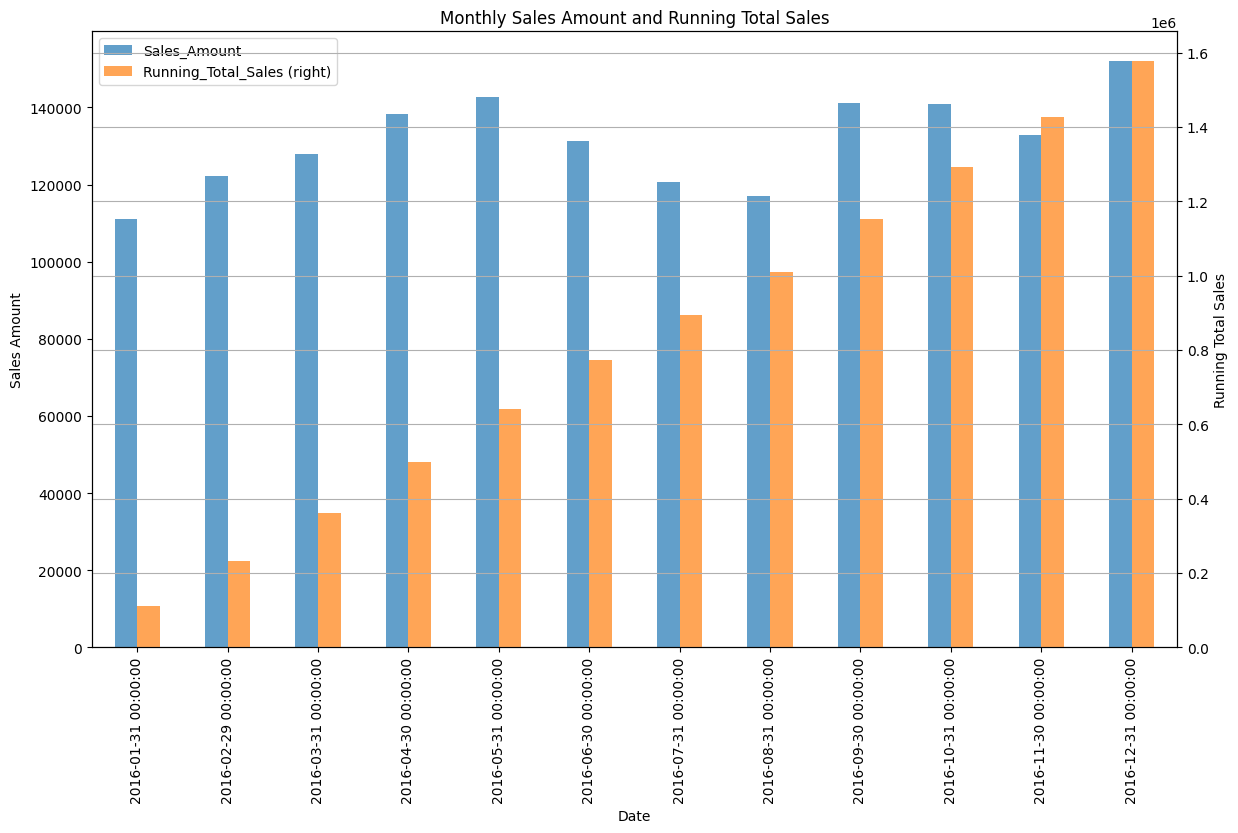

In [53]:
ax = monthly_df[['Sales_Amount', 'Running_Total_Sales']].plot(kind='bar', secondary_y='Running_Total_Sales', figsize=(14, 8), alpha=0.7)

ax.set_title('Monthly Sales Amount and Running Total Sales')
ax.set_xlabel('Date')
ax.set_ylabel('Sales Amount')
ax.right_ax.set_ylabel('Running Total Sales')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()
